<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_excel("data (2).xlsx")

In [105]:
treatment_names = df.iloc[2].tolist()[3:]

In [106]:
for i in range(len(treatment_names)):
  if treatment_names[i] == "Drip'":
    treatment_names[i] = "Drip"

In [107]:
set(treatment_names)

{'Drip', 'Instant', 'Press', 'Steam'}

In [108]:
df = pd.read_excel("data (2).xlsx", skiprows=8)

In [109]:
sample_names = df.columns[3:]

In [110]:
ans = dict.fromkeys(treatment_names) #I got it this need a copy
index = 0
for i in treatment_names:
  try:
    ans[i].append(sample_names[index])
  except:
    ans[i] = [sample_names[index]]
  index+=1

In [111]:
# # of Features per Treatment is not the sum but need to remve replicate

In [112]:
!pip install tabulate

In [161]:
from tabulate import tabulate
import pylab
cache = []
for treatment in ans.keys():
  totel_features = []
  for sample in ans[treatment]:
    name = sample
    data = df[name]
    features = [i for i in data if i != 0]
    totel_features.append(features)
  lengths = [len(i) for i in totel_features]
  bucket = np.zeros_like(totel_features[0])
  for i in totel_features:
    index = 0
    for j in i:
      if j != 0:
        bucket[index] += 1
      index += 1
  bucket = np.array(bucket)
  cache.append([["Treatment:", [treatment]*len(lengths)],
  ["Total # of Features for Each Sample:", lengths],
  ["Average # of Features by Treatment: ", [np.mean(lengths)]*len(lengths)],
  ["StdErr of # of Features by Treatment: ", [np.std(lengths, ddof=1)/np.sqrt(3)]*len(lengths)],
  ["StdErr of # of Features by Treatment: ", [np.sum(bucket==3)]*len(lengths)],
  ["# of Features in only One Replicate: ", [np.sum(i==1) for i in totel_features]],
  ["# of Features per Treatment: ", [np.sum(bucket>=1)]*len(lengths)]])
  print(tabulate(cache[-1]))
  print()

IndexError: ignored

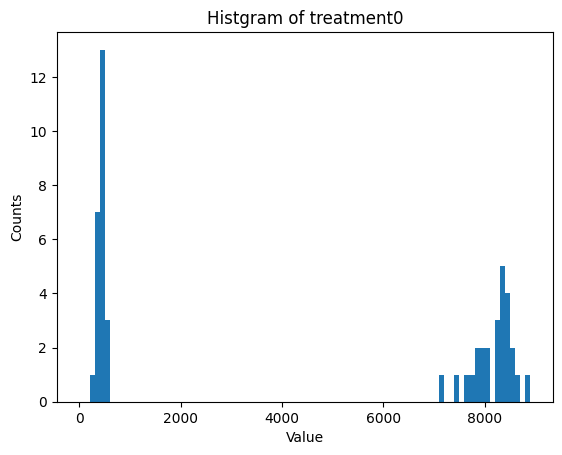

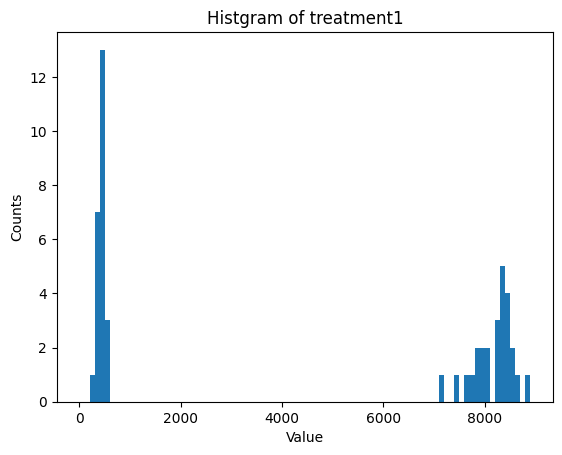

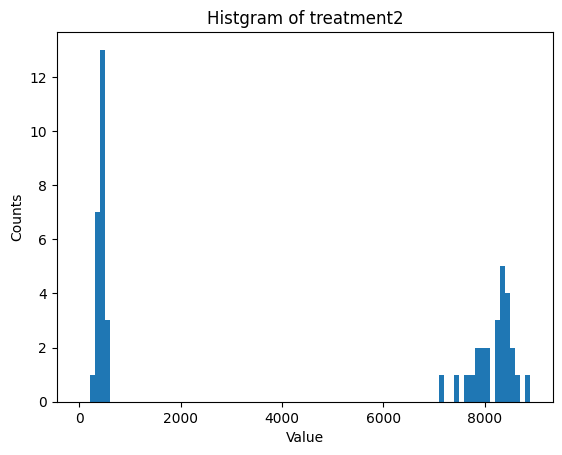

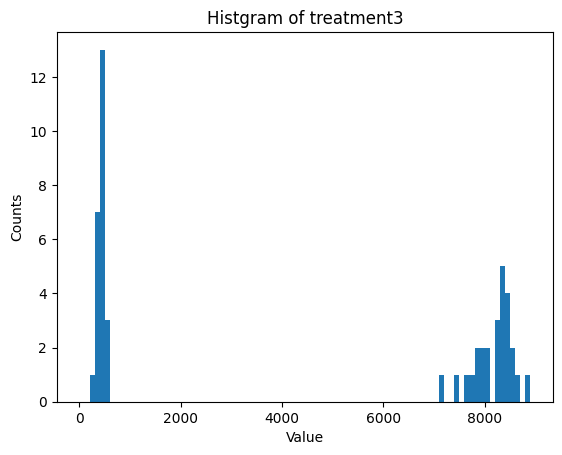

In [155]:
for i in range(4):
  pylab.hist(cache[0][1][1], bins=np.arange(0, np.max(cache[0][1][1]), 100))
  pylab.title("Histgram of treatment" + str(i))
  pylab.xlabel("Value")
  pylab.ylabel("Counts")
  pylab.show()

# 3. Does your data have any outliers?
Yes, for most of the treatments, there are near-zero vales, these zero values could be considered as outlier.
# 4. Plot a Histogram of your prefered dataset. Is your data normal?
If we ignored the outliers, the data is mostly normal. When included the outliers, it sis bimodal
# 5. Does your data have any skew or kertosis?
All of them are some what kertosis at the center.

# 6. What type of statistics are most appropriate to determine significance of this data?